# Clustering

In [1]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt


In [4]:
file_path = "../data/processed/adult.data"
df = pd.read_csv(file_path)

In [5]:
X = df.drop(columns=["income"]).copy()
X_matrix = X.to_numpy()

Ya que tenemos los datos preprocesados y las variables categóricas con one-hot encoding, podemos aplicar K-Prototypes para realizar clustering.

In [6]:
categorical_cols = [i for i, col in enumerate(X.columns) if X[col].nunique() <= 2]

In [8]:
costs = []
K_range = range(2, 10)

for k in K_range:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=21562, n_init=5)
    kproto.fit_predict(X_matrix, categorical=categorical_cols)
    costs.append(kproto.cost_)


: 

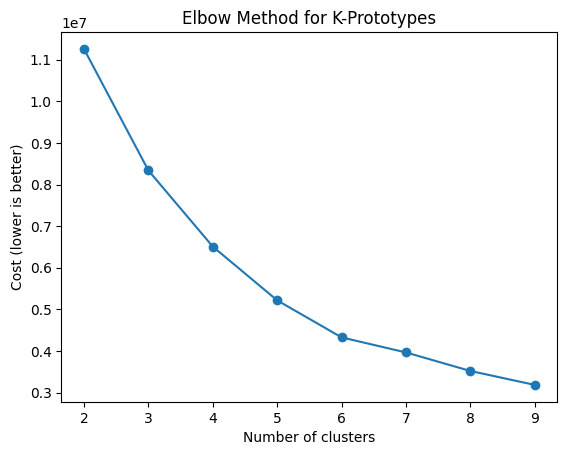

In [35]:
plt.plot(K_range, costs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for K-Prototypes')
plt.show()

El número óptimo de clusters es `6`.

In [6]:
kproto = KPrototypes(n_clusters=6, init='Huang', random_state=21562, n_init=5)
clusters = kproto.fit_predict(X_matrix, categorical=categorical_cols)
df['cluster'] = clusters
df['cluster'] = df['cluster'].astype('category')

In [8]:
# Numeric centroids (mean values of numeric columns)
numeric_centroids = kproto.cluster_centroids_[:, :len(X.columns) - len(categorical_cols)]

# Categorical centroids (mode values of categorical columns)
categorical_centroids = kproto.cluster_centroids_[:, len(X.columns) - len(categorical_cols):]

In [ ]:
numeric_cols = [col for col in X.columns if col not in X.columns[categorical_cols]]
categorical_cols_names = [X.columns[i] for i in categorical_cols]

# Numeric part
numeric_df = pd.DataFrame(numeric_centroids, columns=numeric_cols)

# Categorical part
categorical_df = pd.DataFrame(categorical_centroids, columns=categorical_cols_names)

# Combine
centroids_df = pd.concat([numeric_df, categorical_df], axis=1)
centroids_df['cluster'] = range(kproto.n_clusters)
centroids_df

,age,education-num,hours-per-week,capital-gain,capital-loss,workclass_Local-gov,workclass_Never-worked,workclass_Non-specific,workclass_Private,workclass_Self-emp-inc,...,occupation_Tech-support,occupation_Transport-moving,relationship_Other-relative,relationship_Own-child,relationship_Spouse,race_Other,race_White,sex_Male,native-country_United-States,cluster
0,40.630322,10.449360,41.384701,0.054251,0.030733,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0
1,64.054067,9.429187,17.262201,0.029021,-0.051054,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1
2,26.566421,9.916194,41.273276,-0.127827,-0.059958,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2
3,56.759614,9.837791,41.936402,0.140631,0.057726,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3
4,40.041519,10.875000,64.529973,0.168973,0.111946,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4
5,23.448200,9.435928,20.481593,-0.207013,-0.100453,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,5


In [ ]:
numeric_cols = ["age", "education-num", "hours-per-week", "capital-gain", "capital-loss"]
categorical_cols = [col for col in centroids_df.columns if col not in numeric_cols + ["cluster", ""]]

def describe_cluster(row):
    desc = f"Cluster {int(row['cluster'])}:\n"
    # Numeric features
    for col in numeric_cols:
        desc += f"  - {col}: {row[col]:.1f}\n"
    # Categorical features (one-hot encoded)
    for col in categorical_cols:
        proportion = row[col]
        if proportion > 0.5:  # more than 50% of cluster members
            desc += f"  - Mostly {col.replace('_', ' ')}\n"
    return desc

profiles = centroids_df.apply(describe_cluster, axis=1)
for p in profiles:
    print(p)


Cluster 0:
  - age: 40.6
  - education-num: 10.4
  - hours-per-week: 41.4
  - capital-gain: 0.1
  - capital-loss: 0.0
  - Mostly workclass Private
  - Mostly marital-status Married-civ-spouse
  - Mostly relationship Spouse
  - Mostly race White
  - Mostly sex Male
  - Mostly native-country United-States

Cluster 1:
  - age: 64.1
  - education-num: 9.4
  - hours-per-week: 17.3
  - capital-gain: 0.0
  - capital-loss: -0.1
  - Mostly marital-status Married-civ-spouse
  - Mostly relationship Spouse
  - Mostly race White
  - Mostly sex Male
  - Mostly native-country United-States

Cluster 2:
  - age: 26.6
  - education-num: 9.9
  - hours-per-week: 41.3
  - capital-gain: -0.1
  - capital-loss: -0.1
  - Mostly workclass Private
  - Mostly marital-status Never-married
  - Mostly race White
  - Mostly sex Male
  - Mostly native-country United-States

Cluster 3:
  - age: 56.8
  - education-num: 9.8
  - hours-per-week: 41.9
  - capital-gain: 0.1
  - capital-loss: 0.1
  - Mostly workclass Private


## Análisis de Clusters

## Observaciones

### 1. Diferencias numéricas
- **Edad**: varía aproximadamente entre 23 (Cluster 5) y 64 (Cluster 1). La edad parece ser un factor que define algunos clusters.
- **Horas por semana**: la mayoría de los clusters están alrededor de 40–42 horas/semana, excepto:
  - Cluster 1: ~17 horas/semana (mucho menor → probablemente tiempo parcial o jubilados)
  - Cluster 4: ~64.5 horas/semana (mucho mayor → sobrecarga de trabajo)
- **Nivel educativo** (`education-num`): varía entre 9.4 y 10.9. Este rango es pequeño; la educación no separa fuertemente los clusters.

### 2. Diferencias categóricas
- La mayoría de los clusters están dominados por **workclass Private**, **race White**, **sex Male** y **native-country United-States**, así como **relationship Spouse o Own-child**.
  → La variación categórica es limitada.
- Diferencias aparecen en **estado civil** y **relación**:
  - Clusters 2 y 5: Nunca casados, jóvenes; Cluster 5 tiene `Own-child`.
  - Cluster 1: Casado con pocas horas → posiblemente jubilados o semi-jubilados.
  - Cluster 4: Casado con muchas horas → adultos sobrecargados de trabajo.
- Workclass varía poco, casi todos son Private; por lo tanto, no es un diferenciador importante.

### 3. Resumen de clusters
- **Cluster 0**: Adultos de mediana edad, horas promedio (~41), casados, con cónyuge presente. Adultos trabajadores típicos del sector privado.
- **Cluster 1**: Adultos mayores, pocas horas (~17), casados, cónyuge presente. Posiblemente jubilados o trabajadores a tiempo parcial.
- **Cluster 2**: Jóvenes (~26), horas promedio, nunca casados. Adultos jóvenes solteros.
- **Cluster 3**: Adultos de mediana edad a mayores (~57), horas promedio, casados. Muy similar al Cluster 0; diferencia principal es la edad.
- **Cluster 4**: Adultos de mediana edad (~40), muchas horas (~64.5), casados. Adultos del sector privado con sobrecarga de trabajo.
- **Cluster 5**: Adultos muy jóvenes (~23), pocas horas (~20.5), nunca casados, con hijos. Probablemente padres jóvenes trabajando a tiempo parcial.

## ¿Son suficientemente diferentes?
- **Sí, en parte**:
  - Las características numéricas como **edad** y **horas por semana** crean clusters distintos (especialmente Clusters 1, 4 y 5).
  - Los Clusters 0 y 3 son muy similares — adultos de mediana edad, casados, trabajando ~40–42 horas/semana — por lo que podrían considerarse casi redundantes.
  - Las variables categóricas (como workclass, raza y sexo) son bastante homogéneas y no contribuyen mucho a la diferenciación.

**Interpretación**: K-Prototypes ha identificado clusters principalmente basados en **edad e intensidad laboral**, con algunas distinciones en estado civil y relación. Las características categóricas fueron demasiado uniformes para generar una fuerte diferenciación.


In [14]:
# Export the DataFrame with clusters
df.to_csv("../data/processed/adult_with_clusters.data", index=False)